In [1]:
import netgen.gui
from netgen.csg import *
from ngsolve import *
from ngsolve.solvers import CG
from ngsolve.la import EigenValues_Preconditioner
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def MakeGeometry():
    geometry = CSGeometry()
    box = OrthoBrick(Pnt(0,0,0),Pnt(1,1,1)).bc("outer")
    geometry.Add (box)
    return geometry

ngmesh = MakeGeometry().GenerateMesh(maxh=0.5)
mesh = Mesh(ngmesh)

In [8]:
Draw(mesh)

V = H1(mesh, order = 3, dirichlet =".*")

u,v = V.TnT()

a = BilinearForm(V, condense = True)
a += grad(u) * grad(v) * dx

c = Preconditioner(a, "multigrid")

f = LinearForm(V)
f += 1 * v * dx

gfu = GridFunction(V)

In [9]:
d = []
data = []
kond = []
for l in range(5):
    print(l)
    if l > 0:
        mesh.Refine()
    V.Update()
    gfu.Update()
        
    with TaskManager():
            
        f.Assemble()
        a.Assemble()
        callback = lambda k,r: data.append((k,r))

        CG(mat=a.mat,pre=c.mat,rhs=f.vec,sol=gfu.vec,printrates=False,maxsteps=10000,tol=1e-8,callback = callback)
        lam = EigenValues_Preconditioner(mat = a.mat,pre = c)
        kond.append(max(lam)/min(lam))
        d.append(l)
Draw(gfu)

0
1
2
3
4


In [10]:
temp = []
for i in range(1,len(data)):
    if data[i][0] == 0:
        temp.append(data[i-1][0])
temp.append(data[len(data)-1][0])

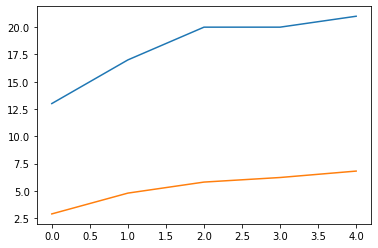

In [11]:
import matplotlib.pyplot as plt
plt.plot(d,temp)
plt.plot(d,kond)